# Project 4, APS1070 Fall 2024
#### **Linear Regression -  14 points**
**Deadline: Nov 29th, 23:00**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself without proper acknowledgment of the source, including generated code (please refer to the course syllabus). Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

**Name**: Mengyang Liu

### How to submit **(HTML + IPYNB)**

1. Download your notebook: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of Colab

3. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


4. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

5. An HTML version of your notebook will appear in the files, so you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files for this notebook on Quercus for grading.


Ref: https://stackoverflow.com/a/64487858

## Part 1 - Getting Started [2 marks]

In this project, we are going to design a mathematical model that predicts electrical grid stability, as described in the paper below:

*Schäfer, Benjamin, et al. 'Taming instabilities in power grid networks by decentralized control.' The European Physical Journal Special Topics 225.3 (2016): 569-582.*


For this purpose, we are using the [Electrical Grid Stability](https://archive.ics.uci.edu/dataset/471/electrical+grid+stability+simulated+data) dataset which includes 10000 instances with 12 features describing the power grid's status. The goal is to unravel patterns and predict the `stab` column, which is a characteristic of the grid that represents its stability. Note that you can ignore the last column named `stabf` since this is a binary indicator showing whether the stability is above a certain threshold.

In [134]:
import pandas as pd
df = pd.read_csv(
    filepath_or_buffer="https://raw.githubusercontent.com/Sabaae/Dataset/main/electrical_grid_stability_simulated_data.csv",
    skipinitialspace=True
)

Here are the steps to complete this portion:

1. Print the dataframe.
2. Prepare your dataset as follows: **[1.5]**
*   Using `train_test_split` from Sklearn, split the dataset into training and validation sets ($80\%$ training, $20\%$ validation). When splitting, set `random_state=111`. **[0.5]**
*   Standardize the data **manually** according to the same method as `StandardScaler` from sklearn, but you may not directly use `StandardScaler'. **[0.5]**
*   Insert a first column of all $1$s in both the training and validation data sets.**[0.5]**
3. Explain why we should not insert the column of $1$s prior to standardization. **[0.5]**

In [135]:
### YOUR CODE HERE ###
df

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,0.023892,unstable
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,-0.025803,stable
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,-0.031810,stable
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,0.037789,unstable


In [136]:
from sklearn.model_selection import train_test_split

# Data splitting
X = df.iloc[:, :-2]
y = df['stab']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=111)

# Standardize Mannualy
X_train_std = (X_train - X_train.mean())/X_train.std()
X_val_std = (X_val - X_train.mean())/X_train.std()

#Insert a first column of all 1 s in both the training and validation data sets.
X_train_std.insert(0, 'column1', 1)
X_val_std.insert(0, 'column1', 1)

I should not insert a column of 1s prior to standardization because it introduces a constant value to the dataset, which can distort the standardization process. Standardization adjusts the mean and variance of each feature, but the constant column of 1s (representing the bias term) will affect the mean and variance calculations for other features. Furthermore, the column of 1s itself has a variance of 0, leading to inproper results during standardization. Therefore, it is best to standardize the features first and add the column of 1s afterward to maintain the proper role of the bias term and ensure the dataset is correctly scaled.

## Part 2 - Linear Regression Using Direct Solution [1 marks]

Implement the direct solution of the linear regression problem on the training set. **[0.5]**

**Note: You should use scipy.linalg.inv to perform the inversion, as numpy.linalg.inv may cause an error.**

Report the root-mean-square error (RMSE) for both the training and validation sets. **[0.5]**

You may use `root_mean_squared_error` from Sklearn for computing the RMSE.

In [137]:
### YOUR CODE HERE ###
import numpy as np
from sklearn.metrics import root_mean_squared_error
from scipy.linalg import inv

W = np.dot(inv(np.dot(X_train_std.T, X_train_std)), np.dot(X_train_std.T, y_train))

# Prediction result
y_train_pred = np.dot(X_train_std, W)
y_val_pred = np.dot(X_val_std, W)

# Calculate RMSE
train_rmse = root_mean_squared_error(y_train_pred, y_train)
val_rmse = root_mean_squared_error(y_val_pred, y_val)

print('RMSE for training set is ', train_rmse)
print('RMSE for validation set is ', val_rmse)

RMSE for training set is  0.02196457001408035
RMSE for validation set is  0.021859307165414888


## Part 3 - Full Batch Gradient Descent [4 marks]

We will now implement a "full batch" gradient descent algorithm and record the training time for our model. Recall that the full batch gradient descent is:

$$
w_t = w_{t-1} - \alpha g_t
$$

where \( \alpha \) is the learning rate and \( g_t \) is your gradient, computed on the entire data.

Here are the steps for this part:

1. **Implement gradient descent for linear regression using a fixed learning rate of \( \alpha = 0.01 \), and iterate until your model's validation RMSE converges.**

   - We consider the gradient descent as having converged when RMSE on the validation set using gradient descent satisfies:

     $$
     \text{RMSE}_\text{GD} \leq 1.0005 \times \text{RMSE}_\text{Direct Solution}
     $$

     where \( \text{RMSE}_\text{Direct Solution} \) is the RMSE on the validation set using the direct solution that you calculated in the previous part.

   - We refer to the quantity \( \text{RMSE}_\text{Direct Solution} \times 1.0005 \) as the convergence threshold (CT). Be sure to compute the gradients yourself! Take a look at the code provided in the tutorial. **[1]**

2. **Record the training time** (from the first iteration until convergence) using the `time.time()` function. **[0.5]**

3. **Plot the training RMSE and the validation RMSE vs. epoch on the same figure.** **[1]**

4. **Comment on overfitting/underfitting** by observing the training and validation RMSE. **[1]**

   **Hint**: Initialize your weights with small random numbers (< 0.00001) & please set **np.random.seed(1001)**.

5. **Explain the difference between epoch and iteration in the Gradient Descent algorithm (SGD/mini-batch).** **[0.5]**


In [138]:
import time
from matplotlib import pyplot as plt

# Define a function to calculate perform full batch GD
def full_bacth(X_train, X_val, y_train, y_val, lr, ct):
    start_time = time.time() ## Records current time
    np.random.seed(1001)
    w = (np.random.random(X_train.shape[1]))/100000 # Initialize weights with small random numbers (< 0.00001)
    tr_rmse = []
    v_rmse = []

    while True:
        y_train_p = np.dot(X_train, w.T)
        y_val_p = np.dot(X_val, w.T)
        tr_rmse.append(root_mean_squared_error(y_train_p, y_train))
        v_rmse.append(root_mean_squared_error(y_val_p, y_val))
        g = (1/len(y_train) * np.dot(X_train.T, y_train_p - y_train))
        w=w-lr*g
        if root_mean_squared_error(y_val_p, y_val) <= ct:
            break      
    plt.title('training RMSE and the validation RMSE vs. epoch ')
    plt.plot(tr_rmse, label = 'training data')
    plt.plot(v_rmse, label = 'validation data')
    plt.xlabel('epoches')
    plt.ylabel('RMSE')
    plt.legend()
    print("--- Total Training Time: %s (s) ---" % (time.time() - start_time))

--- Total Training Time: 1.7756187915802002 (s) ---


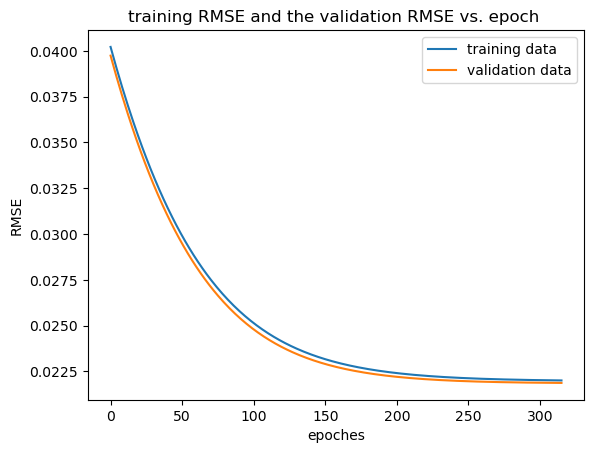

In [139]:
full_bacth(X_train_std, X_val_std, y_train, y_val, 0.01, 1.0005*val_rmse)

Comment:   
The model demonstrates good generalization as the training and validation RMSE values are nearly identical and low. This suggests an appropriate fit with neither overfitting nor underfitting present in this case.

Difference between epoch and iteration in the Gradient Descent algorithm (SGD/mini-batch):  
An epoch refers to one complete pass through the entire dataset during training, allowing the model to see each sample at least once. Whlie an iteration occurs each time the model processes a single batch of data and updates its parameters. The number of iterations in an epoch depends on the batch size. In full-batch gradient descent, one iteration equals one epoch because the entire dataset is used at once. However, in mini-batch gradient descent, the dataset is divided into smaller batches, so multiple iterations occur in each epoch.

## Part 4 - Mini-batch and Stochastic Gradient Descent [4 marks]

Write a function that performs mini-batch gradient descent until the convergence threshold (CT) is reached. **[1]**

The inputs of that function are:
  * Input data (training/validation), Batch size, Learning Rate, Convergence Threshold (CT)

Your function will return the following arrays:
 * The final weights after training.
 * The training RMSE at each epoch.
 * The validation RMSE at each epoch.
 * An array that has the elapsed time from the start of the training process to the end of each epoch (e.g., if each epoch takes exactly 2 seconds, the array would look like: [2 4 6 8 ...]).

Notes:
* use **np.random.seed(1001)** before setting the initial (random) weights

  ```
  def mini_batch_gd(YOUR_INPUTS):
    np.random.seed(1001)

    ### YOUR CODE HERE ###
    
    return YOUR_OUTPUTS
  ```

* For certain batch sizes, GD might not converge to a solution. For that reason, you need to check the RMSE of the validation/training set at each epoch, and if it's getting larger and larger, you should stop the training for that case (the design is up to you!).
* CT will help you to know when your model is converged.
* **Important: after each epoch, you need to shuffle the entire training set.** This ensures that new mini-batches are selected for every epoch. Hint: use `np.random.permutation`.

Let's now use the function to investigate the effect of batch size on convergence. When the batch size is 1, we call that stochastic gradient descent. When the batch size equals the # of training data, it is full-batch (i.e., all data points are used at every iteration). Anywhere in between is mini-batch (we use some of the data).
  * Sweep different values for the mini-batch size (at least 5 values that **converge**), each time using a learning rate of $\alpha= 0.01$. **Hint: Try batch sizes that are powers of two (e.g., 2,4,8,16,...).** These batch sizes fit better on the hardware and may achieve higher performance.  **[0.5]**

Provide the following $3$ plots:
  1.  Plot training and validation RMSE vs. **epoch** for all the **converging** batch sizes (some batch sizes might not converge) in a figure. The X-axis is Epoch # and the Y-axis is RMSE. **[0.5]**
  2. Plot training and validation RMSE vs. **time** for all the **converging** batch sizes in a figure. The X-axis is Time, and the Y-axis is RMSE. **[0.5]**
  3. Plot Total training time (y-axis) vs. Batch size (x-axis). **[0.5]**

Describe your findings, including the main takeaways from each of your plots. **[1]**

In [140]:
### YOUR CODE HERE ###
def mini_GD(X_train, X_val, y_train, y_val, lr, batch, ct):
    start_time = time.time()  # Record start time
    np.random.seed(1001)

    # Initialize weights with small random numbers (< 0.00001)
    w = np.random.random(X_train.shape[1]) / 100000

    # Prepare lists to store RMSE and elapsed time
    tr_rmse = []
    v_rmse = []
    t = []

    # Convert training and validation datasets to numpy arrays for faster operations
    X_train = X_train.values
    y_train = y_train.values
    X_val = X_val.values
    y_val = y_val.values

    # Run until convergence or divergence is detected
    while True:
        shuffle = np.random.permutation(X_train.shape[0])  # Shuffle the entire training set

        # Mini-batch gradient descent
        for i in range(0, X_train.shape[0], batch):
            # Get the batch data using the shuffled indices
            batch_X_train = X_train[shuffle[i:i + batch]]
            batch_y_train = y_train[shuffle[i:i + batch]]

            # Make predictions and calculate gradients
            batch_y_pred = np.dot(batch_X_train, w.T)
            gradient = (1 / len(batch_y_train)) * np.dot(batch_X_train.T, (batch_y_pred - batch_y_train))

            # Update weights
            w -= lr * gradient

        # Make predictions on the full training and validation sets
        y_train_pred = np.dot(X_train, w.T)
        y_val_pred = np.dot(X_val, w.T)

        # Calculate RMSE for training and validation sets
        train_rmse = root_mean_squared_error(y_train, y_train_pred)
        val_rmse = root_mean_squared_error(y_val, y_val_pred)

        # Append RMSE values and elapsed time
        tr_rmse.append(train_rmse)
        v_rmse.append(val_rmse)
        t.append(time.time() - start_time)

        # Check convergence: if validation RMSE is less than or equal to the threshold
        if val_rmse <= ct:
            print(f"Convergence achieved: {batch}")
            break

        # Check for divergence: if validation RMSE starts to increase significantly
        if len(v_rmse) > 1 and v_rmse[-1] > v_rmse[-2] * 1.0005:
            print(f"Diverging batch size: {batch}")
            break

    return w, tr_rmse, v_rmse, t


Diverging batch size: 2
Diverging batch size: 4
Diverging batch size: 8
Convergence achieved: 16
Convergence achieved: 32
Convergence achieved: 64
Convergence achieved: 128
Convergence achieved: 256


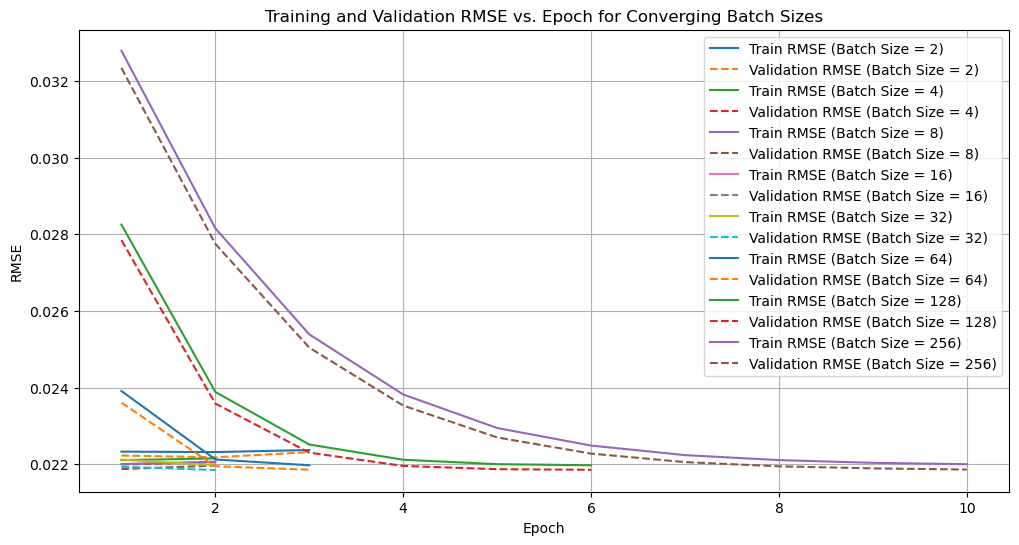

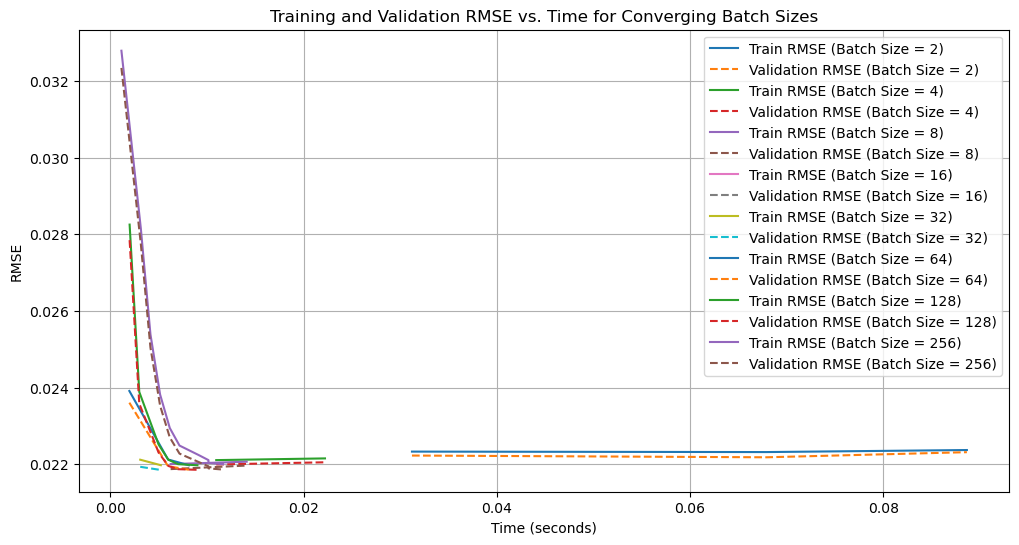

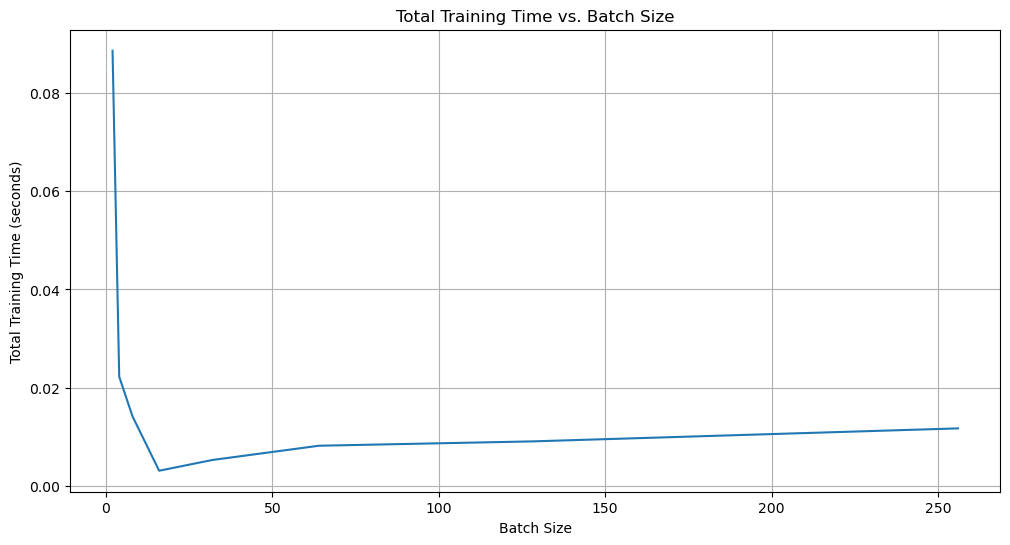

In [195]:
# Define batch sizes that are powers of 2
batch_sizes = [2, 4, 8, 16, 32, 64, 128, 256]
learning_rate = 0.01
convergence_threshold = 1.0005 * val_rmse

# Dictionary to store the results for each batch size
results = {}
for batch_size in batch_sizes:
    w, tr_rmse, v_rmse, t = mini_GD(X_train_std, X_val_std, y_train, y_val, learning_rate, batch_size, convergence_threshold)
    results[batch_size] = {
            "weights": w,
            "train_rmse": tr_rmse,
            "val_rmse": v_rmse,
            "elapsed_time": t}

# 1. Plot Training and Validation RMSE vs. Epoch for Converging Batch Sizes
plt.figure(figsize=(12, 6))
for batch_size, result in results.items():
    epochs = list(range(1, len(result["train_rmse"]) + 1))
    plt.plot(epochs, result["train_rmse"], label=f'Train RMSE (Batch Size = {batch_size})')
    plt.plot(epochs, result["val_rmse"], linestyle='--', label=f'Validation RMSE (Batch Size = {batch_size})')

plt.title('Training and Validation RMSE vs. Epoch for Converging Batch Sizes')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.show()

# 2. Plot Training and Validation RMSE vs. Time for Converging Batch Sizes
plt.figure(figsize=(12, 6))
for batch_size, result in results.items():
    plt.plot(result["elapsed_time"], result["train_rmse"], label=f'Train RMSE (Batch Size = {batch_size})')
    plt.plot(result["elapsed_time"], result["val_rmse"], linestyle='--', label=f'Validation RMSE (Batch Size = {batch_size})')

plt.title('Training and Validation RMSE vs. Time for Converging Batch Sizes')
plt.xlabel('Time (seconds)')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.show()

# 3. Plot Total Training Time vs. Batch Size
total_training_times = [result["elapsed_time"][-1] for result in results.values()]
batch_sizes = list(results.keys())

plt.figure(figsize=(12, 6))
plt.plot(batch_sizes, total_training_times)
plt.title('Total Training Time vs. Batch Size')
plt.xlabel('Batch Size')
plt.ylabel('Total Training Time (seconds)')
plt.grid(True)
plt.show()

**Comments**      
Plot1 shows the effect of batch size on the convergence of training and validation RMSE across epochs. Smaller batch sizes 16, and 32, tend to converge faster initially. This is due to the more frequent updates that allow for quicker progress towards minimizing error. However, their convergence path is noisier because they have high variance in gradient estimates. Larger batch sizes like 256 is smoother and more stable convergence. All batch sizes eventually reach similar RMSE values by the end of the training, indicating that both small and large batches performed well here.   
Plot2 shows that both small and large batch sizes result in a similar convergence pattern when comparing training and validation RMSE. All batch sizes experience a sharp decrease at the beginning in RMSE, indicating that significant learning occurs during this period. After that, the RMSE values stabilize, forming a plateau, meaning further training yields minimal improvement. After the initial drop, the RMSE values for different batch sizes converge and overlap, suggesting that different batch sizes ultimately achieve similar performance in terms of RMSE.    
Plot3 llustrates the relationship between batch size and total training time. The training time is significantly longer for very small batch sizes. As the batch size increases, there is a sharp decrease in training time. This reduction occurs because small batch sizes require more iterations, resulting in higher computational overhead and longer training duration.    


**Takeway**   
There is a clear trade-off between the speed of convergence with small batches and the stability of convergence with large batches. A medium batch size often provides a good balance between the two.        
Batch size will significantly affect the convergence speed with respect to time here. While larger batches will take shorter time because they reduce the number of required updates.

## Part 5 - Gradient Descent Learning Rate [3 marks]
Use the function that you designed in Part 4 to investigate the effect of learning rate on convergence.

1. Pick 3 batch sizes that do not converge with a learning rate of $\alpha= 0.01$ (last part) and try to find a learning rate that results in convergence for each batch size. Report your findings in a table. Mention batch size, learning rate, and training and validation RMSE. **[1]**

2. Select the best batch size based on Part 4's fastest convergence time and sweep the learning rate (at least 10 values, all should converge) while applying Mini-batch GD.
  
  * Plot the training and validation RMSE vs. **epoch** (x-axis) for all the learning rates that you tried in a figure. **[0.5]**
  * Plot the training and validation RMSE vs. **time** (x-axis) for all the learning rates that you tried in a figure. **[0.5]**
  * Describe your findings, including the main takeaways from each of your plots. **[1]**

In [ ]:
# 5.1
batch_sizes = [2, 4, 8]
convergence_threshold = 1.0005 * val_rmse
results = []

for batch_size in batch_sizes:
    for learning_rate in np.arange(0.01, 0, -0.001):
        w, tr_rmse, v_rmse, t = mini_GD(X_train_std, X_val_std, y_train, y_val, learning_rate, batch_size, convergence_threshold)
        
        # Check for convergence (convergence message indicates success)
        if v_rmse[-1] <= convergence_threshold:
            results.append({
                'batch_size': batch_size,
                'learning_rate': learning_rate,
                'train_rmse': tr_rmse[-1],
                'val_rmse': v_rmse[-1]
            })
            break
convergence_results_df = pd.DataFrame(results)
convergence_results_df

Diverging batch size: 2
Diverging batch size: 2
Diverging batch size: 2
Diverging batch size: 2
Diverging batch size: 2
Diverging batch size: 2
Diverging batch size: 2
Diverging batch size: 2
Convergence achieved: 2
Diverging batch size: 4
Diverging batch size: 4
Diverging batch size: 4
Diverging batch size: 4
Diverging batch size: 4
Diverging batch size: 4
Convergence achieved: 4
Diverging batch size: 8
Convergence achieved: 8


,batch_size,learning_rate,train_rmse,val_rmse
0,2,0.002,0.021993,0.021856
1,4,0.004,0.021993,0.021856
2,8,0.009,0.021999,0.021865


In [232]:
# 5.2
# Get results fromn part4
batch_sizes = [2, 4, 8, 16, 32, 64, 128, 256]
learning_rate = 0.01
convergence_threshold = 1.0005 * val_rmse

# Dictionary to store the results for each batch size
results = {}
for batch_size in batch_sizes:
    w, tr_rmse, v_rmse, t = mini_GD(X_train_std, X_val_std, y_train, y_val, learning_rate, batch_size, convergence_threshold)
    results[batch_size] = {
            "weights": w[-1],
            "train_rmse": tr_rmse[-1],
            "val_rmse": v_rmse[-1],
            "elapsed_time": t[-1]}

Diverging batch size: 2
Diverging batch size: 4
Diverging batch size: 8
Convergence achieved: 16
Convergence achieved: 32
Convergence achieved: 64
Convergence achieved: 128
Convergence achieved: 256


In [242]:
results = pd.DataFrame(results)
r = results.transpose()
r

,weights,train_rmse,val_rmse,elapsed_time
2,0.009175,0.022372,0.022316,0.077487
4,0.010226,0.022154,0.022053,0.024624
8,0.010206,0.022068,0.021967,0.013227
16,0.010037,0.021978,0.021833,0.004558
32,0.010224,0.021976,0.021851,0.005001
64,0.010086,0.021975,0.021859,0.005207
128,0.010104,0.021975,0.021856,0.010096
256,0.009954,0.022003,0.021863,0.012125


In [241]:
smallest_elapsed_time = r.loc[r['elapsed_time'].idxmin()]
smallest_elapsed_time

weights         0.010037
train_rmse      0.021978
val_rmse        0.021833
elapsed_time    0.004558
Name: 16, dtype: float64

In [281]:
np.arange(0.01, 0, -0.001)

array([0.01 , 0.009, 0.008, 0.007, 0.006, 0.005, 0.004, 0.003, 0.002,
       0.001])

The best batch size is 16 based on Part 4's fastest convergence time of 0.004558s

Convergence achieved: 16
Convergence achieved: 16
Convergence achieved: 16
Convergence achieved: 16
Convergence achieved: 16
Convergence achieved: 16
Convergence achieved: 16
Convergence achieved: 16
Convergence achieved: 16
Convergence achieved: 16


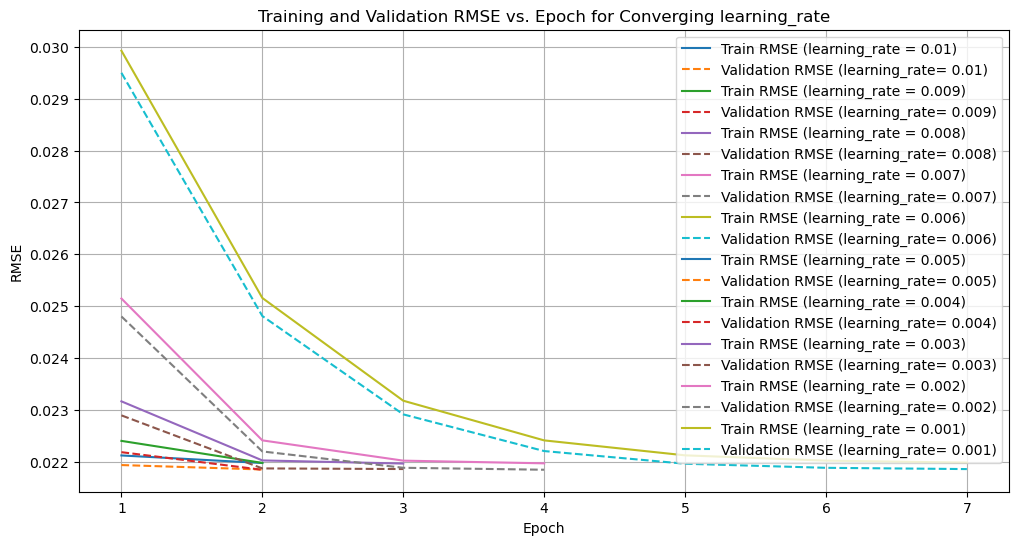

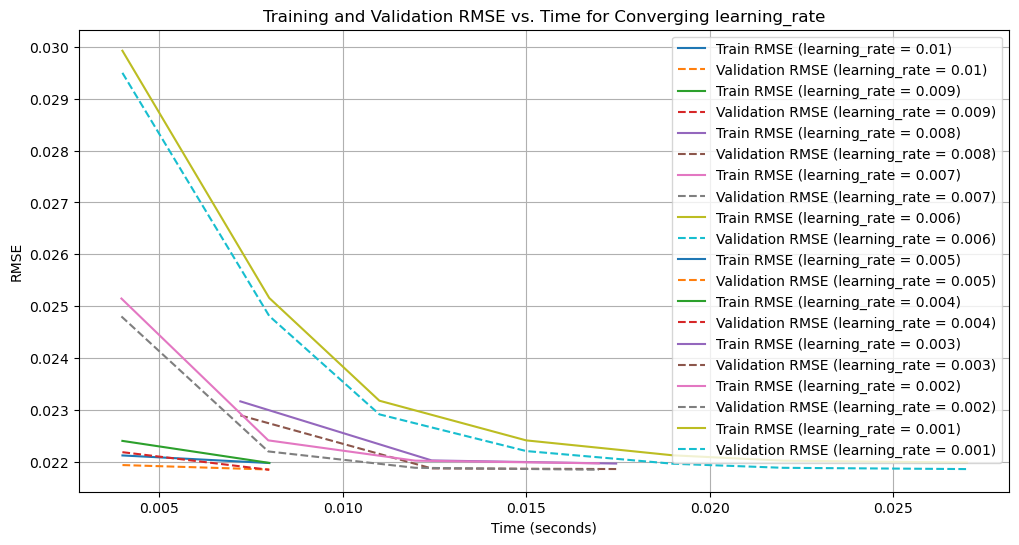

In [282]:
batch_size = 16
convergence_threshold = 1.0005 * val_rmse
results = {}
lr = [0.01 , 0.009, 0.008, 0.007, 0.006, 0.005, 0.004, 0.003, 0.002, 0.001]

for learning_rate in lr:
# for learning_rate in np.arange(0.01, 0, -0.001):
    w, tr_rmse, v_rmse, t = mini_GD(X_train_std, X_val_std, y_train, y_val, learning_rate, batch_size, convergence_threshold)        
    # Check for convergence (convergence message indicates success)
    # if v_rmse[-1] <= convergence_threshold:
    results[learning_rate] = {
                "weights": w,
                "train_rmse": tr_rmse,
                "val_rmse": v_rmse,
                "elapsed_time": t}
        # break

# 1. Plot Training and Validation RMSE vs. Epoch for Converging Learning Rate
plt.figure(figsize=(12, 6))
for learning_rate, result in results.items():
    epochs = list(range(1, len(result["train_rmse"]) + 1))
    plt.plot(epochs, result["train_rmse"], label=f'Train RMSE (learning_rate = {learning_rate})')
    plt.plot(epochs, result["val_rmse"], linestyle='--', label=f'Validation RMSE (learning_rate= {learning_rate})')

plt.title('Training and Validation RMSE vs. Epoch for Converging learning_rate')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.show()

# 2. Plot Training and Validation RMSE vs. Time for Converging Learning Rate
plt.figure(figsize=(12, 6))
for learning_rate, result in results.items():
    plt.plot(result["elapsed_time"], result["train_rmse"], label=f'Train RMSE (learning_rate = {learning_rate})')
    plt.plot(result["elapsed_time"], result["val_rmse"], linestyle='--', label=f'Validation RMSE (learning_rate = {learning_rate})')

plt.title('Training and Validation RMSE vs. Time for Converging learning_rate')
plt.xlabel('Time (seconds)')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.show()

**Findings and Main takeway:**    
From the two graphs, we observe that smaller learning rates require more time and a higher number of epochs to converge. Conversely, using a larger learning rate reduces the time and number of epochs needed for convergence. However, choosing too large a learning rate can lead to instability or divergence. By observing the two graphs, learning rate of 0.006 or 0.007 appears to be optimal because it provides a good balance between fast convergence and achieving low RMSE.